<a href="https://colab.research.google.com/github/vfrantc/data_viz/blob/master/Assingment_2_Frants_Vladimir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2. Frants Vladimir

In [1]:
!sudo apt-get install libgeos-dev
!pip3 install -U git+https://github.com/matplotlib/basemap.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (62.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgeos-dev.
(Readi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Load and augment the dataset

In [3]:
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/events_countries.txt
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/events_countries_sources_years.txt
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/owid-covid-data.csv
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/world_country_and_usa_states_latitude_and_longitude_values.csv
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/WHO-COVID-19-global-data.csv
!wget https://raw.githubusercontent.com/vfrantc/data_viz/master/data/population_by_country_2020.csv

--2020-10-25 14:51:53--  https://raw.githubusercontent.com/vfrantc/data_viz/master/data/events_countries.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21789 (21K) [text/plain]
Saving to: ‘events_countries.txt’

events_countries.tx 100%[===================>]  21.28K  --.-KB/s    in 0.01s   

2020-10-25 14:51:53 (1.62 MB/s) - ‘events_countries.txt’ saved [21789/21789]

--2020-10-25 14:51:53--  https://raw.githubusercontent.com/vfrantc/data_viz/master/data/events_countries_sources_years.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [4]:
ted_df = pd.read_csv('events_countries.txt', sep="\t")

In [5]:
ted_df

,source,country,un_country,macro_region,meso_region,development_level,gdp_per_capita,gdp_volume,hdi,ECI,year,events
1,TED,china,china,Asia,Eastern Asia,Developing economies,16782.0,2.326677e+13,0.758,0.691307,2009,72377
2,TED,united states,united states,Americas,Northern America,Developed economies,59928.0,1.948539e+13,0.920,1.755410,2009,1976947
3,TED,india,india,Asia,Southern Asia,Developing economies,7169.0,9.596835e+12,0.647,0.359807,2009,60724
4,TED,japan,japan,Asia,Eastern Asia,Developed economies,41959.0,5.319800e+12,0.915,2.309380,2009,28989
5,TED,germany,germany,Europe,Western Europe,Developed economies,52574.0,4.345631e+12,0.939,2.075370,2010,83015
...,...,...,...,...,...,...,...,...,...,...,...,...
172,TED,são tomé and príncipe,são tomé and príncipe,Africa,Middle Africa,Developing economies,3313.0,6.860295e+08,0.609,NaN,2015,5
173,MEETUP,federated states of micronesia,federated states of micronesia,Oceania,Oceania,Developing economies,3504.0,3.905965e+08,0.614,NaN,2007,3
174,TED,hong kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,199
175,MEETUP,vatican city,holy see,Europe,Southern Europe,Developed economies,NaN,NaN,NaN,NaN,2007,3


# Augment data with country coordinates and bubble plot

In [6]:
countries_df = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv',
                           usecols=['country', 'latitude', 'longitude'])
countries_df['country'] = countries_df['country'].str.lower()

In [7]:
countries_df

,latitude,longitude,country
0,42.546245,1.601554,andorra
1,23.424076,53.847818,united arab emirates
2,33.939110,67.709953,afghanistan
3,17.060816,-61.796428,antigua and barbuda
4,18.220554,-63.068615,anguilla
...,...,...,...
240,15.552727,48.516388,yemen
241,-12.827500,45.166244,mayotte
242,-30.559482,22.937506,south africa
243,-13.133897,27.849332,zambia


In [8]:
print(ted_df.columns)
print(countries_df.columns)

Index(['source', 'country', 'un_country', 'macro_region', 'meso_region',
       'development_level', 'gdp_per_capita', 'gdp_volume', 'hdi', 'ECI',
       'year', 'events'],
      dtype='object')
Index(['latitude', 'longitude', 'country'], dtype='object')


In [9]:
ted_coord_df = pd.merge(left=ted_df, right=countries_df, left_on='country', right_on='country')

In [10]:
ted_coord_df

,source,country,un_country,macro_region,meso_region,development_level,gdp_per_capita,gdp_volume,hdi,ECI,year,events,latitude,longitude
0,TED,china,china,Asia,Eastern Asia,Developing economies,16782.0,2.326677e+13,0.758,0.691307,2009,72377,35.861660,104.195397
1,TED,united states,united states,Americas,Northern America,Developed economies,59928.0,1.948539e+13,0.920,1.755410,2009,1976947,37.090240,-95.712891
2,TED,india,india,Asia,Southern Asia,Developing economies,7169.0,9.596835e+12,0.647,0.359807,2009,60724,20.593684,78.962880
3,TED,japan,japan,Asia,Eastern Asia,Developed economies,41959.0,5.319800e+12,0.915,2.309380,2009,28989,36.204824,138.252924
4,TED,germany,germany,Europe,Western Europe,Developed economies,52574.0,4.345631e+12,0.939,2.075370,2010,83015,51.165691,10.451526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,BEHANCE,vanuatu,vanuatu,Oceania,Oceania,Developing economies,3110.0,8.880247e+08,0.597,NaN,2016,13,-15.376706,166.959158
164,TED,são tomé and príncipe,são tomé and príncipe,Africa,Middle Africa,Developing economies,3313.0,6.860295e+08,0.609,NaN,2015,5,0.186360,6.613081
165,TED,hong kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,199,22.396428,114.109497
166,MEETUP,vatican city,holy see,Europe,Southern Europe,Developed economies,NaN,NaN,NaN,NaN,2007,3,41.902916,12.453389


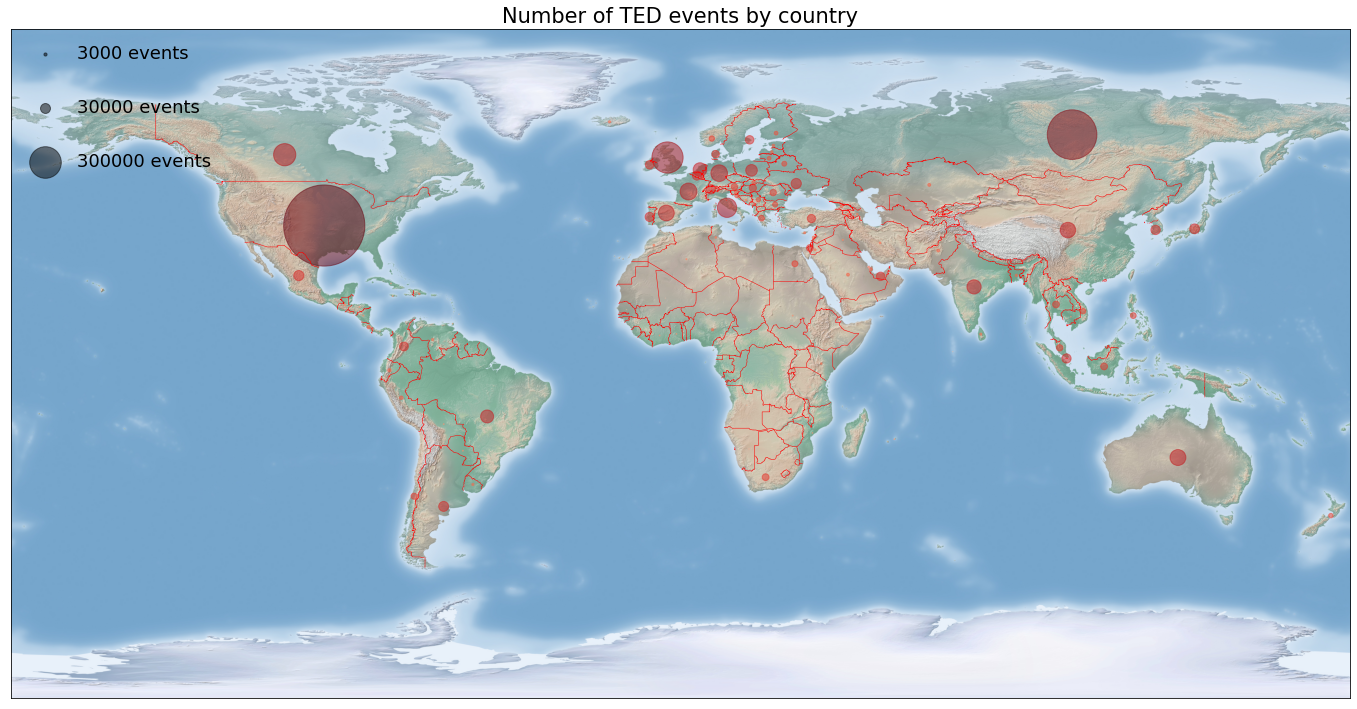

In [11]:
fig = plt.figure(figsize=(24, 16))
plt.title('Number of TED events by country', fontsize='21')
m = Basemap(projection='cyl', 
            resolution='h',
            llcrnrlat=-90, 
            urcrnrlat=90,
            llcrnrlon=-180, 
            urcrnrlon=180)


m.shadedrelief()
m.drawcountries(color='red')

m.scatter(ted_coord_df['longitude'], 
          ted_coord_df['latitude'], 
          latlon=True,
          c=np.log10(ted_coord_df['events']), 
          s=ted_coord_df['events'] / 300,
          cmap='Reds', 
          alpha=0.5)

for a in [10, 100, 1000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a*300) + ' events')
plt.legend(loc='upper left', scatterpoints=1, frameon=False, labelspacing=2, fontsize='18');

# Explore the correlation between the number of events and COVID-19 cases

In [12]:
df_population = pd.read_csv('population_by_country_2020.csv')
df_population['country'] = df_population['Country (or dependency)'].str.lower()
df_population['population'] = df_population['Population (2020)']
df_population = df_population[['country', 'population']]

In [13]:
df_population

,country,population
0,china,1440297825
1,india,1382345085
2,united states,331341050
3,indonesia,274021604
4,pakistan,221612785
...,...,...
230,montserrat,4993
231,falkland islands,3497
232,niue,1628
233,tokelau,1360


In [14]:
df = pd.read_csv('WHO-COVID-19-global-data.csv', sep=',')

In [15]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
69085,2020-10-18,ZW,Zimbabwe,AFRO,11,8110,0,231
69086,2020-10-19,ZW,Zimbabwe,AFRO,37,8147,0,231
69087,2020-10-20,ZW,Zimbabwe,AFRO,12,8159,1,232
69088,2020-10-21,ZW,Zimbabwe,AFRO,28,8187,1,233


In [16]:
cases_df = df.groupby(' Country', as_index=False).agg(total_cases=pd.NamedAgg(column=' New_cases', aggfunc=sum))
cases_df['country'] = cases_df[' Country'].str.lower()
del cases_df[' Country']

In [17]:
cases_df.columns

Index(['total_cases', 'country'], dtype='object')

In [18]:
print(len(ted_coord_df.country.unique()))
print(len(df_population.country.unique()))

168
235


In [19]:
ted_covid = pd.merge(left=ted_coord_df, right=cases_df, left_on='country', right_on='country')
ted_covid = pd.merge(left=ted_covid, right=df_population, left_on='country', right_on='country')

In [20]:
ted_covid

,source,country,un_country,macro_region,meso_region,development_level,gdp_per_capita,gdp_volume,hdi,ECI,year,events,latitude,longitude,total_cases,population
0,TED,china,china,Asia,Eastern Asia,Developing economies,16782.0,2.326677e+13,0.758,0.691307,2009,72377,35.861660,104.195397,91588,1440297825
1,TED,india,india,Asia,Southern Asia,Developing economies,7169.0,9.596835e+12,0.647,0.359807,2009,60724,20.593684,78.962880,7706946,1382345085
2,TED,japan,japan,Asia,Eastern Asia,Developed economies,41959.0,5.319800e+12,0.915,2.309380,2009,28989,36.204824,138.252924,94524,126407422
3,TED,germany,germany,Europe,Western Europe,Developed economies,52574.0,4.345631e+12,0.939,2.075370,2010,83015,51.165691,10.451526,392049,83830972
4,TED,brazil,brazil,Americas,South America,Developing economies,15662.0,3.255145e+12,0.761,0.608252,2009,50838,-14.235004,-51.925280,5273954,212821986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TED,antigua and barbuda,antigua and barbuda,Americas,Caribbean,Developing economies,25146.0,2.399538e+09,0.776,NaN,2015,15,17.060816,-61.796428,122,98069
144,TED,san marino,san marino,Europe,Southern Europe,Developed economies,63037.0,2.122523e+09,0.961,NaN,2018,13,43.942360,12.457777,796,33944
145,MEETUP,saint lucia,saint lucia,Americas,Caribbean,Developing economies,10315.0,1.876190e+09,0.745,NaN,2011,8,13.909444,-60.978893,38,183774
146,MEETUP,solomon islands,solomon islands,Oceania,Oceania,Developing economies,2339.0,1.487935e+09,0.557,NaN,2014,1,-9.645710,160.156194,3,689671


In [21]:
ted_covid['TED events normalized by population'] = ted_covid['events'] / ted_covid['population']
ted_covid['cases_normalized'] = ted_covid['total_cases'] / ted_covid['population']
ted_covid['GDP per capita'] = ted_covid['gdp_per_capita']
ted_covid['Total COVID-19 cases'] = ted_covid['total_cases']

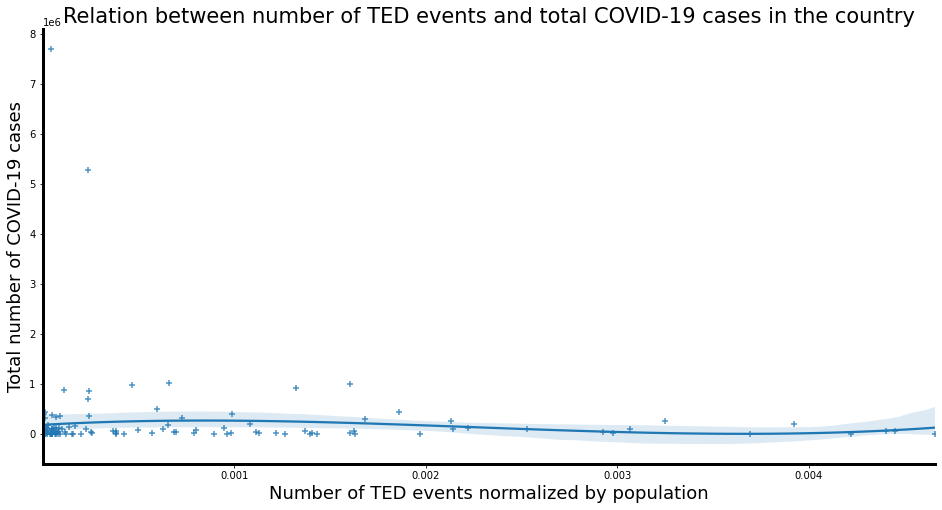

In [22]:
plt.figure(figsize=(16, 8))
plt.title('Relation between number of TED events and total COVID-19 cases in the country', fontsize=21)
ax = sns.regplot(x='TED events normalized by population', y='Total COVID-19 cases', marker="+", order=3,data=ted_covid)
ax.set_ylabel('Total number of COVID-19 cases', fontsize=18)
ax.set_xlabel('Number of TED events normalized by population', fontsize=18)
#pl.set_xlim(0, 350)
for _,s in ax.spines.items():
    s.set_linewidth(3)
    s.set_color('black')
sns.despine()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


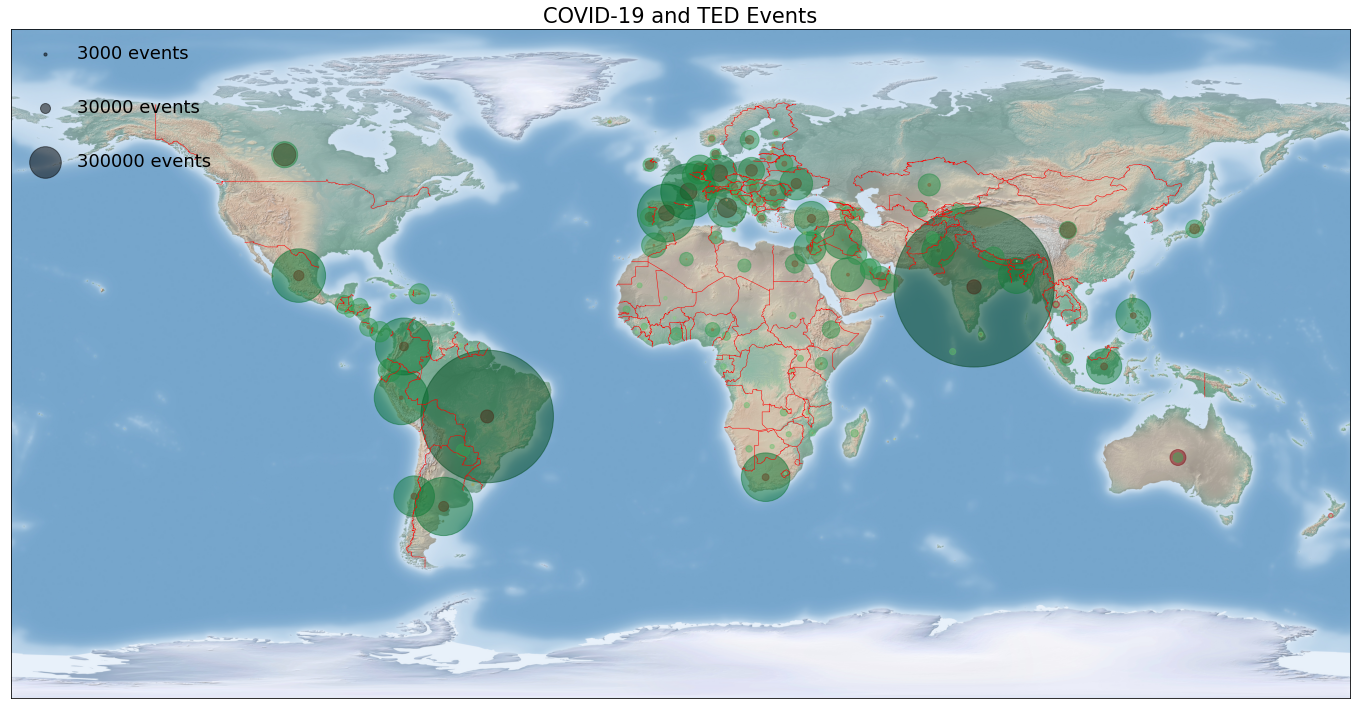

In [23]:
fig = plt.figure(figsize=(24, 16))
plt.title('COVID-19 and TED Events', fontsize='21')
m = Basemap(projection='cyl', 
            resolution='h',
            llcrnrlat=-90, 
            urcrnrlat=90,
            llcrnrlon=-180, 
            urcrnrlon=180)


m.shadedrelief()
m.drawcountries(color='red')

m.scatter(ted_covid['longitude'], 
          ted_covid['latitude'], 
          latlon=True,
          c=np.log10(ted_covid['events']), 
          s=ted_covid['events'] / 300,
          cmap='Reds', 
          alpha=0.5)

m.scatter(ted_covid['longitude'], 
          ted_covid['latitude'], 
          latlon=True,
          c=np.log10(ted_covid['total_cases']), 
          s=ted_covid['total_cases'] / 300,
          cmap='Greens', 
          alpha=0.5)

for a in [10, 100, 1000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a*300) + ' events')
plt.legend(loc='upper left', scatterpoints=1, frameon=False, labelspacing=2, fontsize='18');

In [24]:
len(ted_covid['country'].unique())

148